In [64]:
# Importing necessary libraries
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [2]:
data_dir=os.path.join('dataset/Fold1/Fold1/Fold1')
path_train_mpx=glob.glob(os.path.join(data_dir,'Train','Monkeypox','*.jpg'))
path_train_nmpx=glob.glob(os.path.join(data_dir,'Train','Others','*.jpg'))
path_test_mpx=glob.glob(os.path.join(data_dir,'Test','Monkeypox','*.jpg'))
path_test_nmpx=glob.glob(os.path.join(data_dir,'Test','Others','*.jpg'))
path_val_mpx=glob.glob(os.path.join(data_dir,'Val','Monkeypox','*.jpg'))
path_val_nmpx=glob.glob(os.path.join(data_dir,'Val','Others','*.jpg'))

In [3]:
path_train_mpx

['dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_00.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_01.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_02.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_03.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_04.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_05.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_06.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_07.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_08.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_09.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_10.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_11.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_12.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_01_13.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_02_00.jpg',
 'dataset/Fold1/Fold1/Fold1\\Train\\Monkeypox\\M01_02_0

In [4]:
#Declaring constants
RESIZE_DIM=28 

In [5]:
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key

def get_data(paths_img,resize_dim=None):

    X=[] # initialize empty list for resized images
    for i,path in enumerate(paths_img):
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE) # images loaded in color (BGR)
        if resize_dim is not None:
            img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA) # resize image to 28x28
#         X.append(np.expand_dims(img,axis=2)) # expand image to 28x28x1 and append to the list.
        X.append(img) # expand image to 28x28x1 and append to the list
        # display progress
        if i==len(paths_img)-1:
            end='\n'
        else: end='\r'
        print('processed {}/{}'.format(i+1,len(paths_img)),end=end)
        
    X=np.array(X) # tranform list to numpy array
    
    return X

In [6]:
X_train_mpx=get_data(path_train_mpx,resize_dim=RESIZE_DIM)

processed 980/980


In [7]:
y_train_mpx = np.zeros(980)

In [8]:
X_train_nmpx=get_data(path_train_nmpx,resize_dim=RESIZE_DIM)
X_test_mpx=get_data(path_test_mpx,resize_dim=RESIZE_DIM)
X_test_nmpx=get_data(path_test_nmpx,resize_dim=RESIZE_DIM)

processed 1162/1162
processed 20/20
processed 25/25


In [9]:
X_val_mpx=get_data(path_val_mpx,resize_dim=RESIZE_DIM)
X_val_nmpx=get_data(path_val_nmpx,resize_dim=RESIZE_DIM)

processed 168/168
processed 252/252


In [10]:
y_train_mpx = np.zeros(980)
y_train_nmpx = np.ones(1162)
y_test_mpx = np.zeros(20)
y_test_nmpx = np.ones(25)
y_val_mpx = np.zeros(168)
y_val_nmpx = np.ones(252)

In [11]:
X_train_all = np.concatenate((X_train_mpx, X_train_nmpx), axis=0)
y_train_all = np.concatenate((y_train_mpx, y_train_nmpx), axis=0)

y_train_all = y_train_all.reshape(2142,1)

In [12]:
X_test_all = np.concatenate((X_test_mpx, X_test_nmpx), axis=0)
y_test_all = np.concatenate((y_test_mpx, y_test_nmpx), axis=0)

y_test_all = y_test_all.reshape(45,1)

In [13]:
X_val_all = np.concatenate((X_val_mpx, X_val_nmpx), axis=0)
y_val_all = np.concatenate((y_val_mpx, y_val_nmpx), axis=0)

y_val_all = y_val_all.reshape(420,1)

In [67]:
y_train_cat = tf.keras.utils.to_categorical(y_train_all, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test_all, num_classes=2)
y_val_cat = tf.keras.utils.to_categorical(y_val_all, num_classes=2)

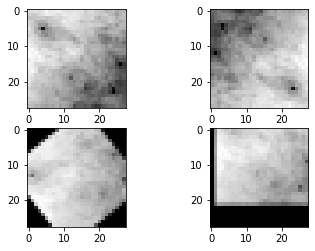

In [14]:
plt.subplot(221)
plt.imshow(X_train_all[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_all[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_all[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_all[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [15]:
X_show_all = X_train_all

In [16]:
X_train_all = X_train_all.reshape(X_train_all.shape[0],28, 28,1).astype('float32')
X_test_all = X_test_all.reshape(X_test_all.shape[0],28, 28,1).astype('float32')

In [17]:
X_train_all = X_train_all/255
X_test_all=X_test_all/255

In [89]:
model = keras.Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 16)        

In [103]:
# compile model
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
history = model.fit(X_train_all, y_train_cat, validation_data=(X_val_all, y_val_cat), batch_size=128, epochs=15)


Epoch 1/15
17/17 [==============================] - 2s 133ms/step - loss: 0.3846 - accuracy: 0.8436 - val_loss: 297.7499 - val_accuracy: 0.4000
Epoch 2/15
17/17 [==============================] - 2s 127ms/step - loss: 0.3951 - accuracy: 0.8385 - val_loss: 296.6648 - val_accuracy: 0.4000
Epoch 3/15
17/17 [==============================] - 2s 125ms/step - loss: 0.4016 - accuracy: 0.8324 - val_loss: 379.6965 - val_accuracy: 0.4000
Epoch 4/15
17/17 [==============================] - 2s 126ms/step - loss: 0.3689 - accuracy: 0.8562 - val_loss: 472.2731 - val_accuracy: 0.4000
Epoch 5/15
17/17 [==============================] - 2s 125ms/step - loss: 0.3807 - accuracy: 0.8436 - val_loss: 199.7592 - val_accuracy: 0.4024
Epoch 6/15
17/17 [==============================] - 2s 125ms/step - loss: 0.3467 - accuracy: 0.8576 - val_loss: 427.9780 - val_accuracy: 0.4000
Epoch 7/15
17/17 [==============================] - 2s 126ms/step - loss: 0.3458 - accuracy: 0.8585 - val_loss: 403.9127 - val_accuracy:

In [98]:
model.save("cnn.h5")

In [78]:
pred = model.predict(X_test_all)

2/2 [==============================] - 0s 6ms/step


In [79]:
pred_labels = [np.argmax(i) for i in pred]

In [84]:
pred_labels

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1]

In [107]:
model.evaluate(X_test_all, y_test_cat)

2/2 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.6222


[0.6739792823791504, 0.6222222447395325]

In [122]:
history